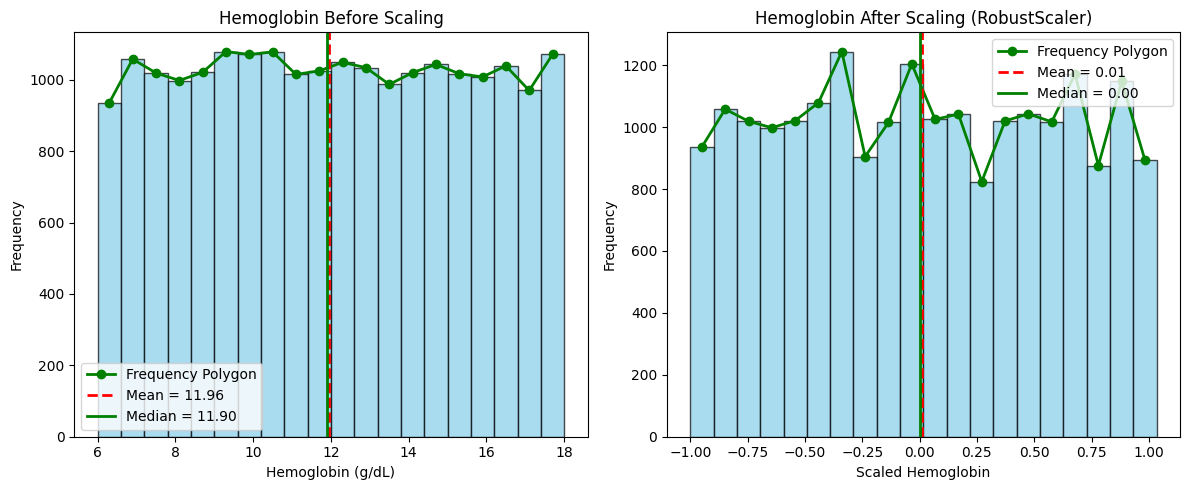

(20538, 37)
['age_of_the_patient', 'blood_pressure_mm_hg_', 'specific_gravity_of_urine', 'albumin_in_urine', 'sugar_in_urine', 'random_blood_glucose_level_mg_dl_', 'blood_urea_mg_dl_', 'serum_creatinine_mg_dl_', 'sodium_level_meq_l_', 'potassium_level_meq_l_', 'hemoglobin_level_gms_', 'packed_cell_volume_', 'white_blood_cell_count_cells_cumm_', 'red_blood_cell_count_millions_cumm_', 'estimated_glomerular_filtration_rate_egfr_', 'urine_protein_to_creatinine_ratio', 'urine_output_ml_day_', 'serum_albumin_level', 'cholesterol_level', 'parathyroid_hormone_pth_level', 'serum_calcium_level', 'serum_phosphate_level', 'body_mass_index_bmi_', 'cystatin_c_level', 'c_reactive_protein_crp_level', 'interleukin_6_il_6_level', 'red_blood_cells_in_urine', 'pus_cells_in_urine', 'pus_cell_clumps_in_urine', 'bacteria_in_urine', 'hypertension_yes_no_', 'diabetes_mellitus_yes_no_', 'coronary_artery_disease_yes_no_', 'anemia_yes_no_', 'family_history_of_chronic_kidney_disease', 'urinary_sediment_microscopy_

,age_of_the_patient,blood_pressure_mm_hg_,specific_gravity_of_urine,albumin_in_urine,sugar_in_urine,random_blood_glucose_level_mg_dl_,blood_urea_mg_dl_,serum_creatinine_mg_dl_,sodium_level_meq_l_,potassium_level_meq_l_,...,pus_cells_in_urine,pus_cell_clumps_in_urine,bacteria_in_urine,hypertension_yes_no_,diabetes_mellitus_yes_no_,coronary_artery_disease_yes_no_,anemia_yes_no_,family_history_of_chronic_kidney_disease,urinary_sediment_microscopy_results,target
0,54,167,1.023,1,4,96,169.101369,7.55,146.068410,6.272576,...,abnormal,not present,not present,yes,yes,no,no,no,normal,No_Disease
1,42,127,1.023,3,2,73,183.223479,13.37,123.501427,5.611303,...,normal,not present,present,no,yes,no,yes,yes,abnormal,Low_Risk
2,38,148,1.016,0,0,77,193.141665,9.49,149.456527,3.965957,...,normal,not present,not present,no,no,yes,no,no,abnormal,No_Disease
3,7,98,1.017,4,0,225,125.939396,10.98,131.758843,4.980997,...,normal,not present,present,no,no,yes,yes,no,abnormal,No_Disease
4,67,174,1.015,1,1,376,197.188600,3.01,120.912465,4.097602,...,abnormal,not present,not present,no,no,no,yes,no,normal,No_Disease
5,14,92,1.006,4,2,371,132.802723,13.98,132.584281,3.835989,...,abnormal,not present,present,yes,no,no,yes,no,normal,No_Disease
6,9,156,1.010,2,0,255,186.928101,4.54,137.973337,4.420588,...,normal,not present,not present,yes,no,no,yes,no,abnormal,No_Disease
7,67,100,1.010,5,3,260,27.308196,8.73,120.531186,4.794412,...,normal,present,present,no,no,yes,yes,yes,abnormal,No_Disease
8,42,138,1.017,4,4,352,169.656648,6.92,138.009505,5.103625,...,normal,present,present,yes,no,no,yes,no,abnormal,No_Disease
9,23,127,1.020,2,4,196,37.503679,5.25,149.675547,5.460159,...,abnormal,not present,present,yes,no,no,no,yes,abnormal,No_Disease


In [1]:
# === Member D: Scaling & Normalization with Frequency Polygon ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# === Setup ===
df = pd.read_csv("C:\\Users\\TUF\\OneDrive\\Desktop\\SLIIT 2Y1S\\AI and ML\\Project\\AIML_Project\\kidney_disease_dataset(S).csv")
df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w]+', '_', regex=True)

# Keep only useful columns
useful_cols = [
    'age_of_the_patient','blood_pressure_mm_hg_','specific_gravity_of_urine','albumin_in_urine',
    'sugar_in_urine','random_blood_glucose_level_mg_dl_','blood_urea_mg_dl_','serum_creatinine_mg_dl_',
    'sodium_level_meq_l_','potassium_level_meq_l_','hemoglobin_level_gms_','packed_cell_volume_',
    'white_blood_cell_count_cells_cumm_','red_blood_cell_count_millions_cumm_',
    'estimated_glomerular_filtration_rate_egfr_','urine_protein_to_creatinine_ratio','urine_output_ml_day_',
    'serum_albumin_level','cholesterol_level','parathyroid_hormone_pth_level','serum_calcium_level',
    'serum_phosphate_level','body_mass_index_bmi_','cystatin_c_level','c_reactive_protein_crp_level',
    'interleukin_6_il_6_level','red_blood_cells_in_urine','pus_cells_in_urine','pus_cell_clumps_in_urine',
    'bacteria_in_urine','hypertension_yes_no_','diabetes_mellitus_yes_no_','coronary_artery_disease_yes_no_',
    'anemia_yes_no_','family_history_of_chronic_kidney_disease','urinary_sediment_microscopy_results','target'
]
df = df[useful_cols]

# === Preprocessing ===
num_cols = df.select_dtypes(include=['float64','int64']).columns
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# === EDA Visualization: Before vs After Scaling (Hemoglobin) ===
plt.figure(figsize=(12,5))

# Before scaling
plt.subplot(1,2,1)
counts, bins, patches = plt.hist(df["hemoglobin_level_gms_"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.plot((bins[:-1] + bins[1:]) / 2, counts, color="green", marker="o", linestyle="-", linewidth=2, label="Frequency Polygon")
plt.axvline(df["hemoglobin_level_gms_"].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean = {df['hemoglobin_level_gms_'].mean():.2f}")
plt.axvline(df["hemoglobin_level_gms_"].median(), color='green', linestyle='-', linewidth=2, label=f"Median = {df['hemoglobin_level_gms_'].median():.2f}")
plt.title("Hemoglobin Before Scaling")
plt.xlabel("Hemoglobin (g/dL)")
plt.ylabel("Frequency")
plt.legend()

# After scaling
plt.subplot(1,2,2)
counts, bins, patches = plt.hist(df_scaled["hemoglobin_level_gms_"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.plot((bins[:-1] + bins[1:]) / 2, counts, color="green", marker="o", linestyle="-", linewidth=2, label="Frequency Polygon")
plt.axvline(df_scaled["hemoglobin_level_gms_"].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean = {df_scaled['hemoglobin_level_gms_'].mean():.2f}")
plt.axvline(df_scaled["hemoglobin_level_gms_"].median(), color='green', linestyle='-', linewidth=2, label=f"Median = {df_scaled['hemoglobin_level_gms_'].median():.2f}")
plt.title("Hemoglobin After Scaling (RobustScaler)")
plt.xlabel("Scaled Hemoglobin")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

print(df.shape)        # shows number of rows and columns
print(df.columns.tolist())  # lists all column names

df.head(10)
